<a href="https://colab.research.google.com/github/notSURZO/ML-algorithms/blob/main/Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-means clustering algorithm***

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

## Example 1

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


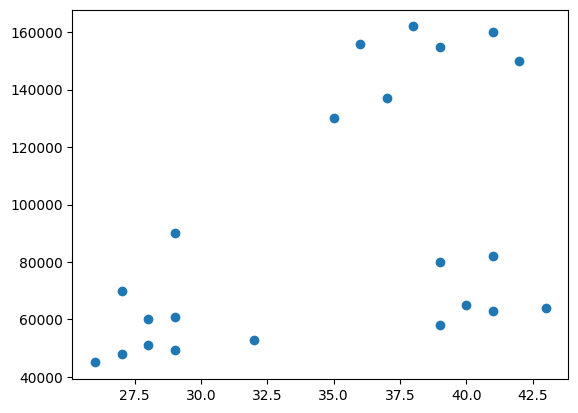

In [ ]:
plt.scatter(df["Age"], df["Income($)"])

MinMaxScaler Preprocessing

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[["Age"]])
df['Age'] = scaler.transform(df[['Age']])

df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] =  y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


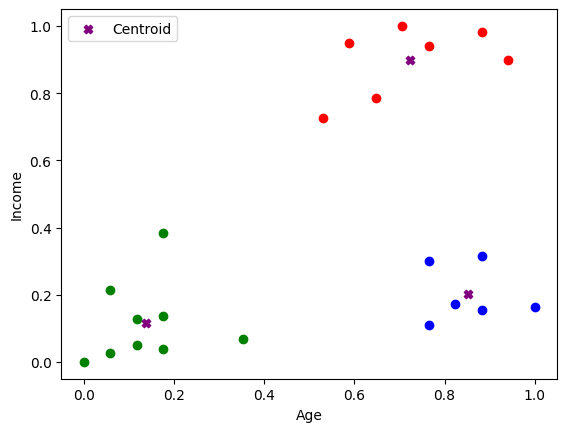

In [ ]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]




plt.scatter(df1.Age, df1["Income($)"], color = "green")
plt.scatter(df2.Age, df2["Income($)"], color = "red")
plt.scatter(df3.Age, df3["Income($)"], color = "blue")


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'purple', marker='X', label='Centroid')

plt.ylabel("Income")
plt.xlabel("Age")

plt.legend()

Elbow Plotting to determine best K

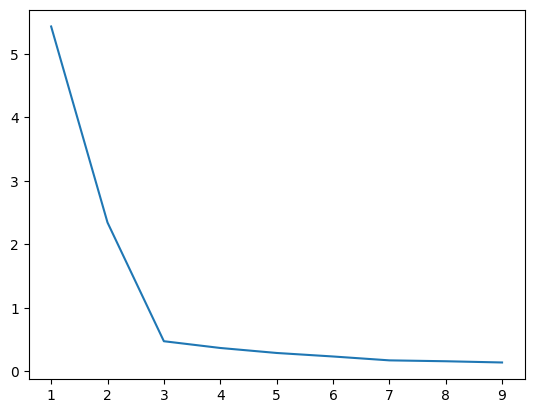

In [ ]:
k_rng = range(1,10)
sse_list = []

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    sse_list.append(km.inertia_)

plt.plot(k_rng , sse_list)

### Example 2 (iris flower dataset)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris(return_X_y = True,as_frame=True)

target_df = iris_dataset[0]

target_df.index

target_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
scaler = MinMaxScaler()
scaler.fit(target_df[["petal length (cm)"]])
target_df["petal length (cm)"] = scaler.transform(target_df[["petal length (cm)"]])

scaler.fit(target_df[["petal width (cm)"]])
target_df["petal width (cm)"] = scaler.transform(target_df[["petal width (cm)"]])

target_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667
...,...,...,...,...
145,6.7,3.0,0.711864,0.916667
146,6.3,2.5,0.677966,0.750000
147,6.5,3.0,0.711864,0.791667
148,6.2,3.4,0.745763,0.916667


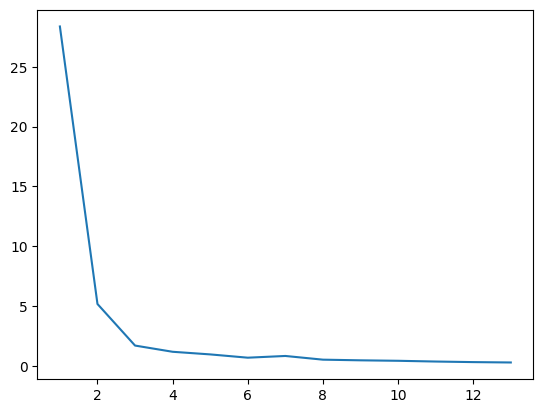

In [ ]:
k_range = range(1,14)
sse = []

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(target_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.plot(k_range, sse)

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(target_df[['petal length (cm)', 'petal width (cm)']])
target_df["cluster"] = y_pred

target_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1
...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,0
146,6.3,2.5,0.677966,0.750000,0
147,6.5,3.0,0.711864,0.791667,0
148,6.2,3.4,0.745763,0.916667,0


In [ ]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

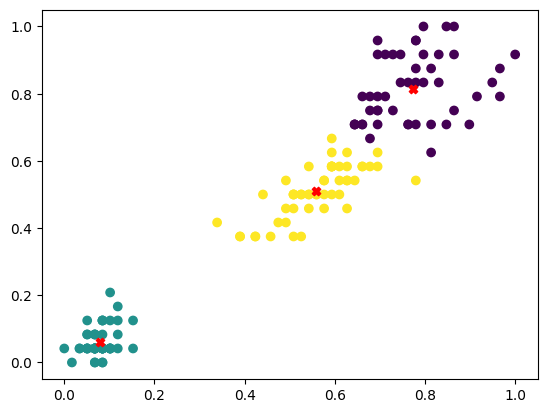

In [ ]:
plt.scatter(target_df.iloc[:,2], target_df.iloc[:,3], c = y_pred, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'red', marker='X', label='Centroid')


# Agglomerative Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scipy.cluster.hierarchy as shc

In [ ]:
df = pd.read_csv('countries.csv')
df

,Rank,ID,Country,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,1,840,United States,North America,339996.56,2.669515e+13,1.862448e+13,78515.94
1,2,156,China,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97
2,3,392,Japan,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35
3,4,276,Germany,Europe,83294.63,4.564778e+12,3.477796e+12,54802.79
4,5,356,India,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46
...,...,...,...,...,...,...,...,...
207,208,729,Sudan,Africa,48109.01,0.000000e+00,8.288740e+10,1722.91
208,209,760,Syria,Asia,23227.01,0.000000e+00,2.216308e+10,954.19
209,210,788,Tunisia,Africa,12458.22,0.000000e+00,4.170356e+10,3347.47
210,211,796,Turks and Caicos Islands,North America,46.06,0.000000e+00,9.175505e+08,19919.90


In [ ]:
df = pd.read_csv('countries.csv')
# data = df[['GDP_per_capita', 'UN_GDP', 'IMF_GDP']]
data = df.iloc[:, 6:8]
data

,UN_GDP,GDP_per_capita
0,1.862448e+13,78515.94
1,1.121828e+13,15336.97
2,4.936212e+12,42916.35
3,3.477796e+12,54802.79
4,2.259642e+12,2725.46
...,...,...
207,8.288740e+10,1722.91
208,2.216308e+10,954.19
209,4.170356e+10,3347.47
210,9.175505e+08,19919.90


In [ ]:
scaler = MinMaxScaler()

scaler.fit(data[['GDP_per_capita']])
data['GDP_per_capita'] = scaler.transform(data[['GDP_per_capita']])

scaler.fit(data[['UN_GDP']])
data['UN_GDP'] = scaler.transform(data[['UN_GDP']])

# scaler.fit(data[['IMF_GDP']])
# data['IMF_GDP'] = scaler.transform(data[['IMF_GDP']])

data

,UN_GDP,GDP_per_capita
0,1.000000,0.439739
1,0.602341,0.084637
2,0.265039,0.239649
3,0.186733,0.306458
4,0.121327,0.013754
...,...,...
207,0.004450,0.008119
208,0.001190,0.003798
209,0.002239,0.017250
210,0.000049,0.110396


seeing dendogram and considering the least inter cluster similarity to cut

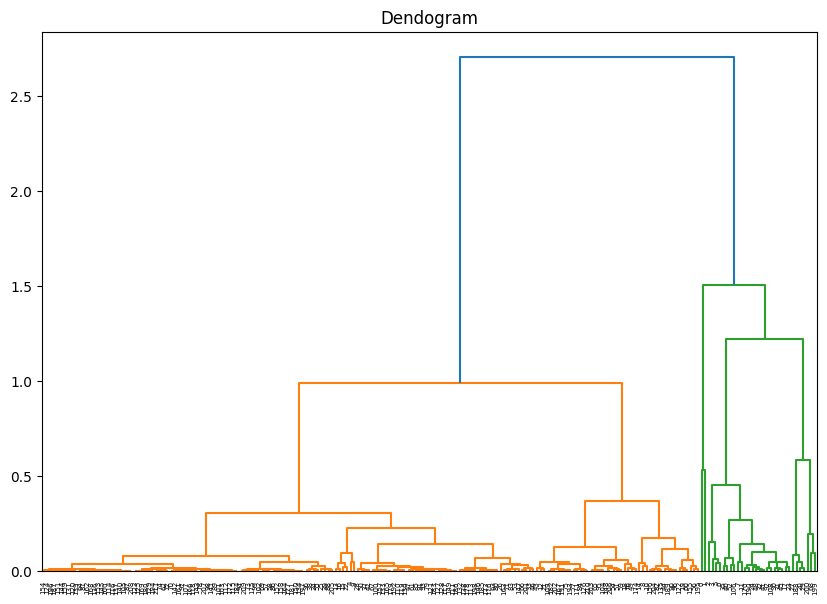

In [ ]:
plt.figure(figsize = (10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
agg_c = AgglomerativeClustering()
y_preds = agg_c.fit_predict(data)

y_preds


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

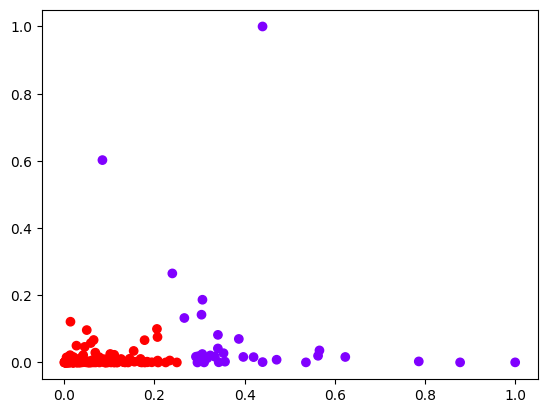

In [ ]:
plt.scatter(data.iloc[:,1], data.iloc[:,0], c = y_preds, cmap='rainbow')


# DBSCAN Clustering Algorithm

In [2]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scipy.cluster.hierarchy as shc

In [3]:
df = pd.read_csv('/content/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [4]:
long_lat = df[['longitude', 'latitude']]
longitude, latitude = df.longitude, df.latitude

dbscan = DBSCAN()
dbscan.fit(long_lat)

dbscan.


DBSCAN()

In [7]:
labels = dbscan.labels_

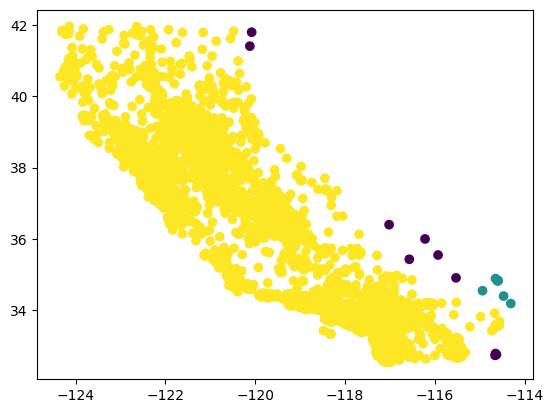

In [8]:
plt.scatter(df['longitude'], df['latitude'], c = labels, cmap='viridis' )

In [9]:
from sklearn.metrics import silhouette_score as ss

ss(long_lat, labels)

np.float64(0.2589526181979395)